In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.6712 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3412 - acc: 0.9041
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2925 - acc: 0.9179
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2637 - acc: 0.9252
Epoch 5/5
10000/10000 [==============================] - 0s 18us/step
loss_and_metrics : [0.22970738295167684, 0.9346]


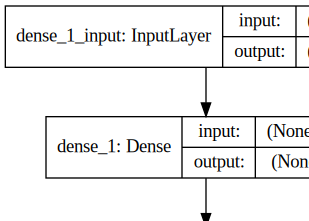

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 179us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 101us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 99us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 111us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 95us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 89us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 86us/step - loss: 2.0721 - acc: 0.2071 - val_loss: 2.0727 - val_acc: 0.2067
Epoch 

700/700 [==============================] - 0s 106us/step - loss: 1.7552 - acc: 0.2614 - val_loss: 1.8256 - val_acc: 0.2500
Epoch 61/1000
700/700 [==============================] - 0s 116us/step - loss: 1.7566 - acc: 0.2814 - val_loss: 1.8335 - val_acc: 0.2400
Epoch 62/1000
700/700 [==============================] - 0s 142us/step - loss: 1.7531 - acc: 0.2729 - val_loss: 1.8311 - val_acc: 0.2267
Epoch 63/1000
700/700 [==============================] - 0s 134us/step - loss: 1.7505 - acc: 0.2857 - val_loss: 1.8299 - val_acc: 0.2000
Epoch 64/1000
700/700 [==============================] - 0s 144us/step - loss: 1.7484 - acc: 0.2800 - val_loss: 1.8268 - val_acc: 0.2200
Epoch 65/1000
700/700 [==============================] - 0s 173us/step - loss: 1.7457 - acc: 0.2814 - val_loss: 1.8298 - val_acc: 0.2033
Epoch 66/1000
700/700 [==============================] - 0s 124us/step - loss: 1.7439 - acc: 0.2786 - val_loss: 1.8296 - val_acc: 0.2067
Epoch 67/1000
700/700 [==============================] 

700/700 [==============================] - 0s 124us/step - loss: 1.6661 - acc: 0.3114 - val_loss: 1.8219 - val_acc: 0.2200
Epoch 121/1000
700/700 [==============================] - 0s 134us/step - loss: 1.6646 - acc: 0.3071 - val_loss: 1.8132 - val_acc: 0.2233
Epoch 122/1000
700/700 [==============================] - 0s 133us/step - loss: 1.6637 - acc: 0.3229 - val_loss: 1.8194 - val_acc: 0.2200
Epoch 123/1000
700/700 [==============================] - 0s 136us/step - loss: 1.6629 - acc: 0.3100 - val_loss: 1.8139 - val_acc: 0.2200
Epoch 124/1000
700/700 [==============================] - 0s 121us/step - loss: 1.6619 - acc: 0.3143 - val_loss: 1.8187 - val_acc: 0.2267
Epoch 125/1000
700/700 [==============================] - 0s 137us/step - loss: 1.6606 - acc: 0.3243 - val_loss: 1.8213 - val_acc: 0.2333
Epoch 126/1000
700/700 [==============================] - 0s 187us/step - loss: 1.6592 - acc: 0.3143 - val_loss: 1.8245 - val_acc: 0.2233
Epoch 127/1000
700/700 [=========================

700/700 [==============================] - 0s 84us/step - loss: 1.6134 - acc: 0.3386 - val_loss: 1.8376 - val_acc: 0.2233
Epoch 180/1000
700/700 [==============================] - 0s 123us/step - loss: 1.6110 - acc: 0.3371 - val_loss: 1.8415 - val_acc: 0.2667
Epoch 181/1000
700/700 [==============================] - 0s 118us/step - loss: 1.6115 - acc: 0.3457 - val_loss: 1.8339 - val_acc: 0.2567
Epoch 182/1000
700/700 [==============================] - 0s 121us/step - loss: 1.6106 - acc: 0.3471 - val_loss: 1.8365 - val_acc: 0.2167
Epoch 183/1000
700/700 [==============================] - 0s 73us/step - loss: 1.6115 - acc: 0.3286 - val_loss: 1.8411 - val_acc: 0.2333
Epoch 184/1000
700/700 [==============================] - 0s 66us/step - loss: 1.6093 - acc: 0.3443 - val_loss: 1.8454 - val_acc: 0.2267
Epoch 185/1000
700/700 [==============================] - 0s 67us/step - loss: 1.6076 - acc: 0.3386 - val_loss: 1.8641 - val_acc: 0.2200
Epoch 186/1000
700/700 [=============================

Epoch 239/1000
700/700 [==============================] - 0s 67us/step - loss: 1.5770 - acc: 0.3571 - val_loss: 1.8682 - val_acc: 0.2267
Epoch 240/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5750 - acc: 0.3571 - val_loss: 1.8720 - val_acc: 0.2500
Epoch 241/1000
700/700 [==============================] - 0s 70us/step - loss: 1.5749 - acc: 0.3571 - val_loss: 1.8738 - val_acc: 0.2433
Epoch 242/1000
700/700 [==============================] - 0s 67us/step - loss: 1.5743 - acc: 0.3514 - val_loss: 1.8734 - val_acc: 0.2100
Epoch 243/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5743 - acc: 0.3629 - val_loss: 1.8806 - val_acc: 0.2200
Epoch 244/1000
700/700 [==============================] - 0s 69us/step - loss: 1.5713 - acc: 0.3557 - val_loss: 1.8724 - val_acc: 0.2200
Epoch 245/1000
700/700 [==============================] - 0s 75us/step - loss: 1.5715 - acc: 0.3586 - val_loss: 1.8839 - val_acc: 0.2233
Epoch 246/1000
700/700 [=================

Epoch 299/1000
700/700 [==============================] - 0s 67us/step - loss: 1.5485 - acc: 0.3686 - val_loss: 1.9145 - val_acc: 0.2267
Epoch 300/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5472 - acc: 0.3629 - val_loss: 1.9031 - val_acc: 0.2300
Epoch 301/1000
700/700 [==============================] - 0s 64us/step - loss: 1.5470 - acc: 0.3629 - val_loss: 1.8934 - val_acc: 0.2200
Epoch 302/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5479 - acc: 0.3657 - val_loss: 1.9081 - val_acc: 0.2167
Epoch 303/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5465 - acc: 0.3529 - val_loss: 1.9016 - val_acc: 0.2333
Epoch 304/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5453 - acc: 0.3671 - val_loss: 1.9067 - val_acc: 0.2200
Epoch 305/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5432 - acc: 0.3643 - val_loss: 1.9140 - val_acc: 0.2267
Epoch 306/1000
700/700 [=================

Epoch 359/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5252 - acc: 0.3729 - val_loss: 1.9450 - val_acc: 0.2133
Epoch 360/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5232 - acc: 0.3743 - val_loss: 1.9453 - val_acc: 0.2233
Epoch 361/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5232 - acc: 0.3686 - val_loss: 1.9485 - val_acc: 0.2300
Epoch 362/1000
700/700 [==============================] - 0s 67us/step - loss: 1.5241 - acc: 0.3643 - val_loss: 1.9508 - val_acc: 0.2267
Epoch 363/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5216 - acc: 0.3757 - val_loss: 1.9527 - val_acc: 0.2333
Epoch 364/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5231 - acc: 0.3643 - val_loss: 1.9380 - val_acc: 0.2300
Epoch 365/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5225 - acc: 0.3771 - val_loss: 1.9523 - val_acc: 0.2267
Epoch 366/1000
700/700 [=================

Epoch 419/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5019 - acc: 0.3771 - val_loss: 1.9664 - val_acc: 0.2200
Epoch 420/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5015 - acc: 0.3800 - val_loss: 1.9878 - val_acc: 0.2300
Epoch 421/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5011 - acc: 0.3814 - val_loss: 1.9693 - val_acc: 0.2433
Epoch 422/1000
700/700 [==============================] - 0s 65us/step - loss: 1.5005 - acc: 0.3743 - val_loss: 1.9747 - val_acc: 0.2433
Epoch 423/1000
700/700 [==============================] - 0s 66us/step - loss: 1.5003 - acc: 0.3814 - val_loss: 1.9792 - val_acc: 0.2333
Epoch 424/1000
700/700 [==============================] - 0s 67us/step - loss: 1.5001 - acc: 0.3757 - val_loss: 1.9670 - val_acc: 0.2233
Epoch 425/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4991 - acc: 0.3886 - val_loss: 1.9613 - val_acc: 0.2400
Epoch 426/1000
700/700 [=================

Epoch 479/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4835 - acc: 0.3914 - val_loss: 2.0028 - val_acc: 0.2300
Epoch 480/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4824 - acc: 0.3986 - val_loss: 2.0112 - val_acc: 0.2367
Epoch 481/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4820 - acc: 0.3886 - val_loss: 2.0198 - val_acc: 0.2400
Epoch 482/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4810 - acc: 0.3986 - val_loss: 2.0164 - val_acc: 0.2333
Epoch 483/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4820 - acc: 0.4000 - val_loss: 2.0163 - val_acc: 0.2367
Epoch 484/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4815 - acc: 0.3971 - val_loss: 2.0160 - val_acc: 0.2400
Epoch 485/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4810 - acc: 0.4014 - val_loss: 2.0133 - val_acc: 0.2267
Epoch 486/1000
700/700 [=================

Epoch 539/1000
700/700 [==============================] - 0s 69us/step - loss: 1.4691 - acc: 0.3943 - val_loss: 2.0315 - val_acc: 0.2267
Epoch 540/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4677 - acc: 0.4000 - val_loss: 2.0408 - val_acc: 0.2267
Epoch 541/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4668 - acc: 0.3986 - val_loss: 2.0373 - val_acc: 0.2267
Epoch 542/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4665 - acc: 0.4057 - val_loss: 2.0433 - val_acc: 0.2433
Epoch 543/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4671 - acc: 0.3986 - val_loss: 2.0301 - val_acc: 0.2333
Epoch 544/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4657 - acc: 0.3943 - val_loss: 2.0246 - val_acc: 0.2367
Epoch 545/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4665 - acc: 0.4014 - val_loss: 2.0330 - val_acc: 0.2300
Epoch 546/1000
700/700 [=================

Epoch 599/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4542 - acc: 0.4043 - val_loss: 2.0479 - val_acc: 0.2367
Epoch 600/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4525 - acc: 0.4143 - val_loss: 2.0626 - val_acc: 0.2300
Epoch 601/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4522 - acc: 0.4129 - val_loss: 2.0605 - val_acc: 0.2400
Epoch 602/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4526 - acc: 0.4029 - val_loss: 2.0546 - val_acc: 0.2333
Epoch 603/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4528 - acc: 0.4114 - val_loss: 2.0507 - val_acc: 0.2400
Epoch 604/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4526 - acc: 0.4014 - val_loss: 2.0488 - val_acc: 0.2400
Epoch 605/1000
700/700 [==============================] - 0s 69us/step - loss: 1.4516 - acc: 0.4071 - val_loss: 2.0548 - val_acc: 0.2367
Epoch 606/1000
700/700 [=================

Epoch 659/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4404 - acc: 0.4186 - val_loss: 2.0809 - val_acc: 0.2467
Epoch 660/1000
700/700 [==============================] - 0s 69us/step - loss: 1.4408 - acc: 0.4100 - val_loss: 2.0841 - val_acc: 0.2367
Epoch 661/1000
700/700 [==============================] - 0s 69us/step - loss: 1.4419 - acc: 0.4086 - val_loss: 2.0775 - val_acc: 0.2367
Epoch 662/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4411 - acc: 0.3986 - val_loss: 2.0817 - val_acc: 0.2367
Epoch 663/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4402 - acc: 0.4157 - val_loss: 2.0957 - val_acc: 0.2367
Epoch 664/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4394 - acc: 0.4214 - val_loss: 2.0799 - val_acc: 0.2400
Epoch 665/1000
700/700 [==============================] - 0s 69us/step - loss: 1.4398 - acc: 0.4171 - val_loss: 2.0879 - val_acc: 0.2333
Epoch 666/1000
700/700 [=================

Epoch 719/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4301 - acc: 0.4186 - val_loss: 2.1137 - val_acc: 0.2400
Epoch 720/1000
700/700 [==============================] - 0s 70us/step - loss: 1.4297 - acc: 0.4214 - val_loss: 2.1038 - val_acc: 0.2367
Epoch 721/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4292 - acc: 0.4186 - val_loss: 2.1028 - val_acc: 0.2433
Epoch 722/1000
700/700 [==============================] - 0s 70us/step - loss: 1.4286 - acc: 0.4214 - val_loss: 2.1026 - val_acc: 0.2367
Epoch 723/1000
700/700 [==============================] - 0s 69us/step - loss: 1.4283 - acc: 0.4200 - val_loss: 2.0942 - val_acc: 0.2400
Epoch 724/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4282 - acc: 0.4229 - val_loss: 2.1103 - val_acc: 0.2367
Epoch 725/1000
700/700 [==============================] - 0s 70us/step - loss: 1.4278 - acc: 0.4257 - val_loss: 2.1162 - val_acc: 0.2433
Epoch 726/1000
700/700 [=================

Epoch 779/1000
700/700 [==============================] - 0s 70us/step - loss: 1.4193 - acc: 0.4286 - val_loss: 2.1363 - val_acc: 0.2367
Epoch 780/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4190 - acc: 0.4229 - val_loss: 2.1180 - val_acc: 0.2400
Epoch 781/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4197 - acc: 0.4214 - val_loss: 2.1247 - val_acc: 0.2467
Epoch 782/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4184 - acc: 0.4200 - val_loss: 2.1099 - val_acc: 0.2433
Epoch 783/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4187 - acc: 0.4314 - val_loss: 2.1300 - val_acc: 0.2433
Epoch 784/1000
700/700 [==============================] - 0s 70us/step - loss: 1.4182 - acc: 0.4300 - val_loss: 2.1344 - val_acc: 0.2400
Epoch 785/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4181 - acc: 0.4271 - val_loss: 2.1418 - val_acc: 0.2367
Epoch 786/1000
700/700 [=================

Epoch 839/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4087 - acc: 0.4300 - val_loss: 2.1474 - val_acc: 0.2367
Epoch 840/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4082 - acc: 0.4343 - val_loss: 2.1415 - val_acc: 0.2433
Epoch 841/1000
700/700 [==============================] - 0s 66us/step - loss: 1.4092 - acc: 0.4400 - val_loss: 2.1468 - val_acc: 0.2367
Epoch 842/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4099 - acc: 0.4286 - val_loss: 2.1583 - val_acc: 0.2500
Epoch 843/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4090 - acc: 0.4314 - val_loss: 2.1462 - val_acc: 0.2367
Epoch 844/1000
700/700 [==============================] - 0s 69us/step - loss: 1.4082 - acc: 0.4300 - val_loss: 2.1609 - val_acc: 0.2400
Epoch 845/1000
700/700 [==============================] - 0s 69us/step - loss: 1.4088 - acc: 0.4329 - val_loss: 2.1398 - val_acc: 0.2367
Epoch 846/1000
700/700 [=================

Epoch 899/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4015 - acc: 0.4343 - val_loss: 2.1632 - val_acc: 0.2467
Epoch 900/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4000 - acc: 0.4471 - val_loss: 2.1649 - val_acc: 0.2467
Epoch 901/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4000 - acc: 0.4400 - val_loss: 2.1773 - val_acc: 0.2533
Epoch 902/1000
700/700 [==============================] - 0s 67us/step - loss: 1.4002 - acc: 0.4357 - val_loss: 2.1737 - val_acc: 0.2467
Epoch 903/1000
700/700 [==============================] - 0s 69us/step - loss: 1.3993 - acc: 0.4400 - val_loss: 2.1850 - val_acc: 0.2633
Epoch 904/1000
700/700 [==============================] - 0s 69us/step - loss: 1.3990 - acc: 0.4371 - val_loss: 2.1645 - val_acc: 0.2367
Epoch 905/1000
700/700 [==============================] - 0s 68us/step - loss: 1.4010 - acc: 0.4414 - val_loss: 2.1605 - val_acc: 0.2400
Epoch 906/1000
700/700 [=================

Epoch 959/1000
700/700 [==============================] - 0s 69us/step - loss: 1.3935 - acc: 0.4371 - val_loss: 2.1812 - val_acc: 0.2467
Epoch 960/1000
700/700 [==============================] - 0s 68us/step - loss: 1.3929 - acc: 0.4386 - val_loss: 2.1920 - val_acc: 0.2433
Epoch 961/1000
700/700 [==============================] - 0s 69us/step - loss: 1.3923 - acc: 0.4414 - val_loss: 2.1687 - val_acc: 0.2467
Epoch 962/1000
700/700 [==============================] - 0s 68us/step - loss: 1.3932 - acc: 0.4371 - val_loss: 2.1903 - val_acc: 0.2467
Epoch 963/1000
700/700 [==============================] - 0s 68us/step - loss: 1.3924 - acc: 0.4386 - val_loss: 2.1855 - val_acc: 0.2500
Epoch 964/1000
700/700 [==============================] - 0s 70us/step - loss: 1.3919 - acc: 0.4371 - val_loss: 2.1784 - val_acc: 0.2433
Epoch 965/1000
700/700 [==============================] - 0s 68us/step - loss: 1.3914 - acc: 0.4414 - val_loss: 2.1856 - val_acc: 0.2533
Epoch 966/1000
700/700 [=================